# Spotle AI - NASSCOM Community AI Internship Program
## Task 1 - Project - Analyze Crop Production of India

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import math
import sklearn
import random as rd
import time
import operator
import keras
import matplotlib.pyplot as plot
import matplotlib.patches as  mpatches
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib.figure import Figure
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as pltplot
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings(action="ignore")

Using TensorFlow backend.


In [2]:
crop_df = pd.read_csv ("D:/Spotle AI Internship/state-wise-crop-production-India.csv")
crop_df

,State,Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0
...,...,...,...,...,...
10699,West Bengal,2013,Sugarcane,17021.0,1945042.0
10700,West Bengal,2013,Sunflower,6434.0,8717.0
10701,West Bengal,2013,Tobacco,12570.0,22287.0
10702,West Bengal,2013,Urad,70052.0,48810.0


In [3]:
duplicate = crop_df
duplicate

,State,Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0
...,...,...,...,...,...
10699,West Bengal,2013,Sugarcane,17021.0,1945042.0
10700,West Bengal,2013,Sunflower,6434.0,8717.0
10701,West Bengal,2013,Tobacco,12570.0,22287.0
10702,West Bengal,2013,Urad,70052.0,48810.0


### _Question 1_
### _Find the average production of the crops in India._

In [4]:
avg_crop_prod = crop_df.groupby('Crop').Production.mean().sort_values(ascending = True).reset_index()
print("Average Crop Production in India")
print(avg_crop_prod)

Average Crop Production in India
                   Crop    Production
0                 Apple  0.000000e+00
1                 Peach  0.000000e+00
2       Other Dry Fruit  0.000000e+00
3    Other Citrus Fruit  0.000000e+00
4                 Plums  0.000000e+00
..                  ...           ...
117               Paddy  2.785651e+06
118                Rice  3.074956e+06
119               Wheat  3.136744e+06
120           Sugarcane  1.121993e+07
121            Coconut   9.230316e+08

[122 rows x 2 columns]


In [5]:
avg_crop_prod.to_excel(r'D:\Spotle AI Internship\average Crop Production.xlsx')

In [6]:
print(avg_crop_prod.Production.max())

923031631.6765834


In [7]:
maxProdCrop = avg_crop_prod.loc[avg_crop_prod['Production'].idxmax()]
print("Maximum produced Crop: ", maxProdCrop['Crop'],"\nProduction in Tonnes: ", maxProdCrop['Production'])

Maximum produced Crop:  Coconut  
Production in Tonnes:  923031631.6765834


### _Question 2_
### _Which crop has maximum yield (Tonnes / Hectare)?_

In [8]:
crop_df['Yield'] = crop_df['Production'] / crop_df['Area']
crop_df

,State,Year,Crop,Area,Production,Yield
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0,1.653652
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0,7.448155
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0,0.273750
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0,3537.360890
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0,3.144330
...,...,...,...,...,...,...
10699,West Bengal,2013,Sugarcane,17021.0,1945042.0,114.273074
10700,West Bengal,2013,Sunflower,6434.0,8717.0,1.354834
10701,West Bengal,2013,Tobacco,12570.0,22287.0,1.773031
10702,West Bengal,2013,Urad,70052.0,48810.0,0.696768


In [9]:
avg_crop_yield = crop_df.groupby('Crop').Yield.mean().sort_values(ascending = True).reset_index()
print("Average Crop Yield in India")
print(avg_crop_yield)

Average Crop Yield in India
                  Crop        Yield
0                Apple     0.000000
1    Peas  (vegetable)     0.000000
2      Other Dry Fruit     0.000000
3                Plums     0.000000
4             Pump Kin     0.000000
..                 ...          ...
117            Tapioca    15.863319
118             Banana    25.164447
119             Papaya    33.630105
120          Sugarcane   245.388441
121           Coconut   5762.131563

[122 rows x 2 columns]


In [10]:
avg_crop_yield.to_excel(r'D:\Spotle AI Internship\average Crop Yield.xlsx')

In [11]:
maxYieldCrop = crop_df.loc[crop_df['Yield'].idxmax()]
print("Maximum yielded Crop: ", maxYieldCrop['Crop'],"\nYield in Tonnes per Hectare: ", maxYieldCrop['Yield'],"\nState: ", maxYieldCrop['State'], "\nYear: ", maxYieldCrop['Year'])

Maximum yielded Crop:  Sugarcane 
Yield in Tonnes per Hectare:  70662.5 
State:  Punjab 
Year:  2011


In [12]:
maxAvgYieldCrop = avg_crop_yield.loc[avg_crop_yield['Yield'].idxmax()]
print("Crop yielded maximum average yield: ", maxAvgYieldCrop['Crop'],"\nYield in Tonnes per Hectare: ", maxAvgYieldCrop['Yield'])

Crop yielded maximum average yield:  Coconut  
Yield in Tonnes per Hectare:  5762.1315628135535


### _Question 3_
### _Comparative study on Rice production between Odisha and West Bengal_

In [13]:
odishaRice_df = crop_df[(crop_df['Crop']=='Rice') & (crop_df['State']=='Odisha') ]
odishaRice_df

,State,Year,Crop,Area,Production,Yield
6738,Odisha,2000,Rice,4433520.0,4613380.0,1.040568
6773,Odisha,2001,Rice,4500000.0,7220000.0,1.604444
6807,Odisha,2002,Rice,4273000.0,3278000.0,0.767143
6841,Odisha,2003,Rice,4501000.0,6801000.0,1.510998
6873,Odisha,2004,Rice,4492000.0,6536000.0,1.455031
6892,Odisha,2005,Rice,4479000.0,6858000.0,1.531145
6905,Odisha,2006,Rice,4451000.0,6823000.0,1.532914
6918,Odisha,2007,Rice,4452000.0,7540000.0,1.693621
6931,Odisha,2008,Rice,4455000.0,6812000.0,1.529068
6944,Odisha,2009,Rice,4365000.0,6913000.0,1.583734


In [14]:
westBengalRice_df = crop_df[(crop_df['Crop']=='Rice') & (crop_df['State']=='West Bengal') ]
westBengalRice_df

,State,Year,Crop,Area,Production,Yield
10211,West Bengal,2000,Rice,5435323.0,12428038.0,2.286532
10250,West Bengal,2001,Rice,5503087.0,13815548.0,2.510509
10289,West Bengal,2002,Rice,5842127.0,14389238.0,2.463014
10328,West Bengal,2003,Rice,5856607.0,14662239.0,2.503538
10366,West Bengal,2004,Rice,5783613.0,14884889.0,2.573632
10405,West Bengal,2005,Rice,5782949.0,14510742.0,2.509229
10444,West Bengal,2006,Rice,5687028.0,14745892.0,2.592899
10482,West Bengal,2007,Rice,5719755.0,14719520.0,2.573453
10522,West Bengal,2008,Rice,5935696.0,15037240.0,2.533358
10556,West Bengal,2009,Rice,5630095.0,14340605.0,2.547134


In [15]:
state = ('West Bengal', 'Odisha')
rice_df = crop_df[(crop_df['Crop']=='Rice') & (crop_df['State'].isin(state))].sort_values(by = 'Year')
rice_df

,State,Year,Crop,Area,Production,Yield
6738,Odisha,2000,Rice,4433520.0,4613380.0,1.040568
10211,West Bengal,2000,Rice,5435323.0,12428038.0,2.286532
6773,Odisha,2001,Rice,4500000.0,7220000.0,1.604444
10250,West Bengal,2001,Rice,5503087.0,13815548.0,2.510509
6807,Odisha,2002,Rice,4273000.0,3278000.0,0.767143
10289,West Bengal,2002,Rice,5842127.0,14389238.0,2.463014
6841,Odisha,2003,Rice,4501000.0,6801000.0,1.510998
10328,West Bengal,2003,Rice,5856607.0,14662239.0,2.503538
6873,Odisha,2004,Rice,4492000.0,6536000.0,1.455031
10366,West Bengal,2004,Rice,5783613.0,14884889.0,2.573632


In [16]:
rice_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 6738 to 10693
Data columns (total 6 columns):
State         28 non-null object
Year          28 non-null int64
Crop          28 non-null object
Area          28 non-null float64
Production    28 non-null float64
Yield         28 non-null float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.5+ KB


Text(0.5, 1.0, 'Plot for Area in Odisha and West Bengal')

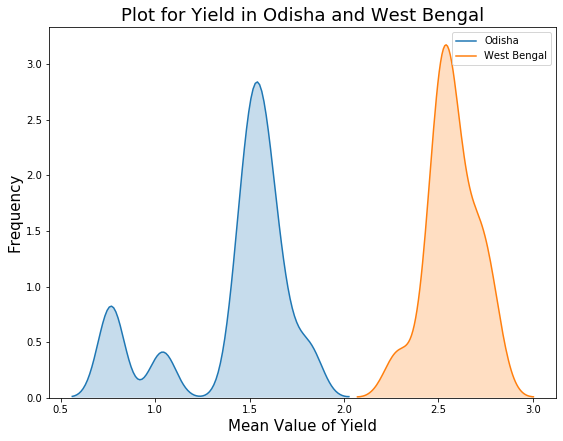

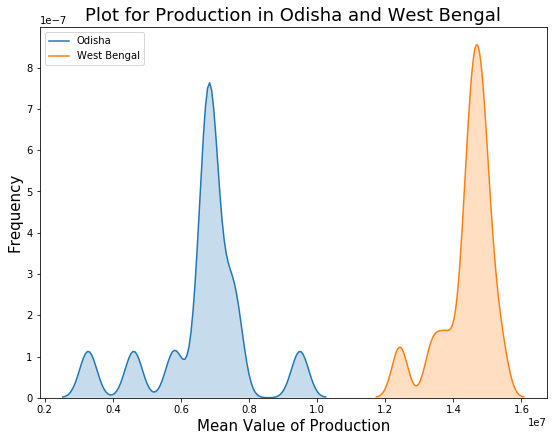

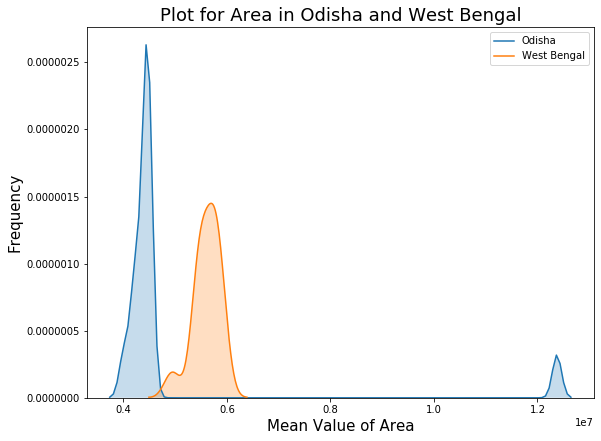

In [28]:
plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sb.kdeplot(odishaRice_df['Yield'],label = "Odisha",shade=True)
sb.kdeplot(westBengalRice_df['Yield'], label = "West Bengal",shade=True)
#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Odisha"),
#           mpatches.Patch(facecolor=plt.cm.Blues(100), label="West Bengal")]
#plt.legend(handles=handles)
plt.xlabel('Mean Value of Yield',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Plot for Yield in Odisha and West Bengal',fontsize=18)

plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sb.kdeplot(odishaRice_df['Production'],label = "Odisha",shade=True)
sb.kdeplot(westBengalRice_df['Production'], label = "West Bengal",shade=True)
#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Odisha"),
#           mpatches.Patch(facecolor=plt.cm.Blues(100), label="West Bengal")]
#plt.legend(handles=handles)
plt.xlabel('Mean Value of Production',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Plot for Production in Odisha and West Bengal',fontsize=18)

plt.figure(figsize=(20,15))
plt.subplot(2, 2, 1)
sb.kdeplot(odishaRice_df['Area'],label = "Odisha",shade=True)
sb.kdeplot(westBengalRice_df['Area'], label = "West Bengal",shade=True)
#handles = [mpatches.Patch(facecolor=plt.cm.Reds(100), label="Odisha"),
#           mpatches.Patch(facecolor=plt.cm.Blues(100), label="West Bengal")]
#plt.legend(handles=handles)
plt.xlabel('Mean Value of Area',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Plot for Area in Odisha and West Bengal',fontsize=18)

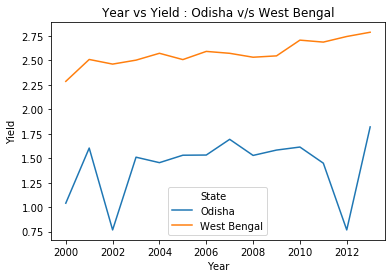

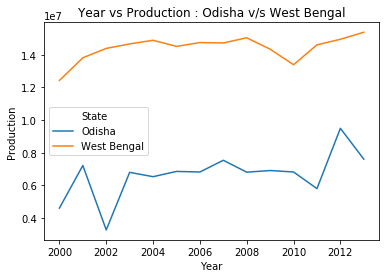

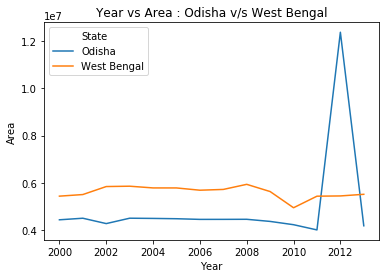

In [37]:
sb.lineplot(data =rice_df, x=odishaRice_df.Year, y=odishaRice_df.Yield, hue = "State")
sb.lineplot(x=westBengalRice_df.Year, y=westBengalRice_df.Yield)
plt.title('Year vs Yield : Odisha v/s West Bengal')
plt.show()

sb.lineplot(data =rice_df, x=odishaRice_df.Year, y=odishaRice_df.Production, hue = "State")
sb.lineplot(x=westBengalRice_df.Year, y=westBengalRice_df.Production)
plt.title('Year vs Production : Odisha v/s West Bengal')
plt.show()

sb.lineplot(data =rice_df, x=odishaRice_df.Year, y=odishaRice_df.Area, hue = "State")
sb.lineplot(x=westBengalRice_df.Year, y=westBengalRice_df.Area)
plt.title('Year vs Area : Odisha v/s West Bengal')
plt.show()

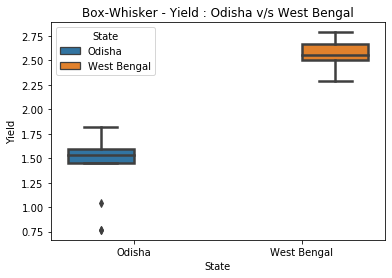

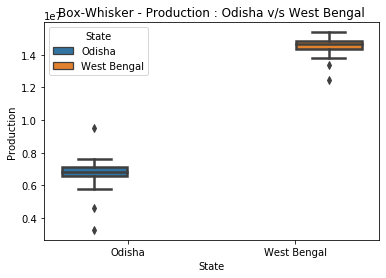

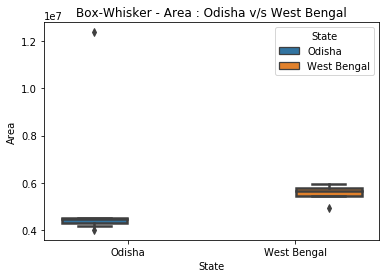

In [42]:
sb.boxplot(x="State", y="Yield", hue= "State",data=rice_df, linewidth=2.5)
plt.title('Box-Whisker - Yield : Odisha v/s West Bengal')
plt.show()

sb.boxplot(x="State", y="Production", hue= "State",data=rice_df, linewidth=2.5)
plt.title('Box-Whisker - Production : Odisha v/s West Bengal')
plt.show()

sb.boxplot(x="State", y="Area", hue= "State",data=rice_df, linewidth=2.5)
plt.title('Box-Whisker - Area : Odisha v/s West Bengal')
plt.show()

###### Inference
From the following graphs, we can say that 
- The production in West Bengal is double fold compared to Odisha although the area utilised for rice production is almost the same (West Bengal having slightly more than Odisha). 
- The yield in West Bengal id double fold when compared with Odisha

From this we can say that the conditions in West Bengal are more suitable than that of Odisha for Rice cultivation

### _Question 4_
### _Which State has the highest production of Wheat?_

In [43]:
wheatProduction = crop_df.loc[crop_df['Crop'].values=='Wheat'].groupby('State').Production.sum().sort_values(ascending = True).reset_index()
print("Total Wheat Production. Statewise\n")
print(wheatProduction)

Total Wheat Production. Statewise

                     State   Production
0                   Kerala          0.0
1                  Mizoram          4.0
2               Tamil Nadu         60.0
3           Andhra Pradesh       8304.0
4   Dadra and Nagar Haveli      14689.0
5                  Tripura      22000.0
6                Meghalaya      27456.0
7               Chandigarh      31905.0
8        Arunachal Pradesh      79706.0
9                   Odisha      83855.2
10                  Sikkim      86509.0
11                Nagaland     102210.0
12              Telangana      116469.0
13               Jharkhand     569101.3
14                   Assam     891455.0
15            Chhattisgarh    1520799.0
16               Karnataka    3040594.0
17      Jammu and Kashmir     3293673.8
18        Himachal Pradesh    5041136.0
19             Uttarakhand   10970090.0
20             West Bengal   12406670.0
21             Maharashtra   17730775.0
22                 Gujarat   32414100.0
23   

In [44]:
maxWheatProd = wheatProduction.loc[wheatProduction['Production'].idxmax()]
print("State with maximum wheat production: ", maxWheatProd['State'],"\nTotal production in Tonnes: ", maxWheatProd['Production'])

State with maximum wheat production:  Uttar Pradesh 
Total production in Tonnes:  379678145.0


### _Question 5_
### _Build a model to predict the production of Rice in 2014 for Andhra Pradesh, Uttar Pradesh and Tamil Nadu_

In [45]:
duplicate = duplicate.rename(columns={'Production' : 'class'})  #renaming the result column
colnames=duplicate.columns
label_encoder = LabelEncoder()                               
duplicate['State']= label_encoder.fit_transform(duplicate['State'])
labels = duplicate.pop('class')  #removing the class column from the features table
keys = label_encoder.classes_  
values = label_encoder.transform(label_encoder.classes_)
dictionary = dict(zip(keys, values)) #storing the converted column entries as (key,value) pairs
print(dictionary)
xtrain, xtest, ytrain, ytest = train_test_split(duplicate, labels, test_size=0.20,random_state=5)  #splitting the dataset into train and test set
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = scaler.transform(xtrain) 
xtest = scaler.transform(xtest)

KeyError: 'class'

In [ ]:
model = Sequential()
model.add(Dense(16, input_dim=20, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
ybinary = keras.utils.to_categorical(ytrain, num_classes=4, dtype='int')
# Train the model on the train set (output debug information)
model.fit(xtrain, ybinary, epochs=100, verbose=1)